In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal.windows import gaussian

In [2]:
y, sr = librosa.load(librosa.example("libri1"), sr=None)

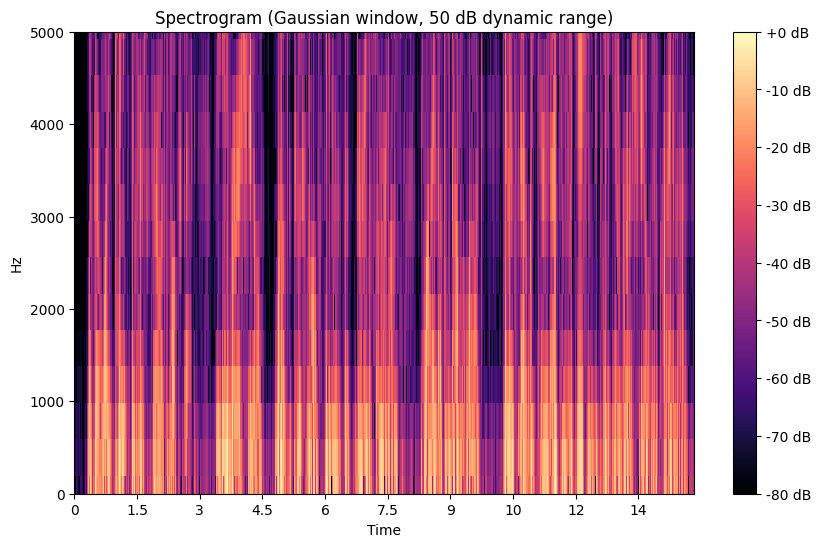

In [7]:
window_length = int(0.005 * sr)  # ~5 ms window length
hop_length = int(0.001 * sr)    # ~1 ms time step
n_fft = 2 ** int(np.ceil(np.log2(window_length)))  # Ensure FFT size covers window

# Generate Gaussian window
gaussian_window = gaussian(window_length, std=window_length / 6)  # Standard deviation for Gaussian shape

# Compute STFT with Gaussian window
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=window_length, window=gaussian_window)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Frequency range (e.g., 0 to 5000 Hz for speech analysis)
max_freq = 5000  # in Hz
max_bin = int(max_freq / (sr / n_fft))

# Plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db[:max_bin, :], sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Gaussian window, 50 dB dynamic range)')
plt.ylim(0, max_freq)
plt.show()

In [ ]:
# Frequency range (e.g., 0 to 5000 Hz for speech analysis)
max_freq = 5000  # in Hz
max_bin = int(max_freq / (sr / n_fft))

# Plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db[:max_bin, :], sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Gaussian window, 50 dB dynamic range)')
plt.ylim(0, max_freq)
plt.show()


In [4]:
from scipy.signal.windows import gaussian
gaussian_window = gaussian(window_length, std=window_length / 6)  # Standard deviation for Gaussian shape
